In [66]:
import cv2
import pytesseract#importing several libraries

In [67]:
from IPython.display import Image
import os
!ls ../input/images1

OCR_5.jpg


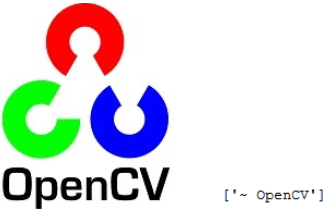

In [68]:
Image("/kaggle/input/images1/OCR_5.jpg")#for displaying image

In [69]:
im=cv2.imread("/kaggle/input/images1/OCR_5.jpg")
config=('-l eng --oem 1 --psm 3')#it creates a configuration object i.e, -1 eng is flag that denotes for english language,-oem 1 specify that the engine should be tesseract original engine,-psm 3 denotes that the image should be processed using single block of text
text=pytesseract.image_to_string(im,config=config)#extract the text from the image
text=text.split("\n")
print(text)

['OpenCV © cee', '\x0c']


In [70]:
from IPython.display import Image
import os
!ls ../input/images3

OCR_6.jpg


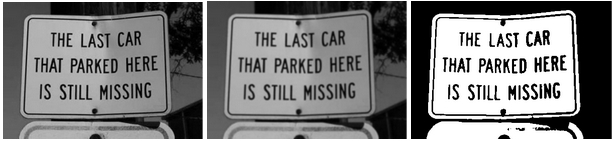

In [71]:
Image("/kaggle/input/images3/OCR_6.jpg")

In [78]:
#Text detection using opencv
import cv2
import pytesseract

def gray(img):#defining a gray function for converting bgr color space to gray color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def blur(img):#define a blur function to remove the noise from the image
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    return img_blur

def threshold(img):#defining a threshold function from converting to an image to a binary image
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    return img

def contours_text(orig, img, contours):#this function is used for finding the contours in an image, a contour is a closed curve,finding the objects in an image
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2)
        # cv2.imshow('cnt', rect)
        cv2.waitKey()
        cropped = orig[y:y + h, x:x + w]
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config)
        print(text)

if __name__ == "__main__":#main function in the code that reads an image from disk converts it to greyscale,blurs it,threshold it,print the text in each contour.
    img = cv2.imread("/kaggle/input/images3/OCR_6.jpg")
    im_gray = gray(img)
    im_blur = blur(im_gray)
    im_thresh = threshold(im_blur)
    contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # contours_text(img, im_thresh, contours)

    # use matplotlib instead of OpenCV to show the image
    import matplotlib.pyplot as plt

    # plt.imshow(img)
    # plt.show()

    # only want the text present in the image
    text = pytesseract.image_to_string(img, config=config)#config parameter is used for specifying the languages of the text and the format of the output
    print(text)


THE LAST CAR THE LAST CAR THE LAST CAR
THAT PARKED HERE THAT PARKED HERE THAT PARKED HERE

IS STILL MISSING IS STILL MISSING IS STILL MISSING

 

